In [40]:
import csv
import numpy as np 
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

import pickle
from johansen import Johansen

In [41]:
df = pd.read_csv('v_ma_formatted.csv')

In [42]:
df.head()

,PERMNO,date,TICKER,PRC,ewretd,RETURNS
0,91233,20080319,MA,208.39000,-0.017066,0.000000
1,91233,20080320,MA,220.38000,0.014587,0.057536
2,91233,20080324,MA,216.50000,0.021720,-0.017606
3,91233,20080325,MA,224.98000,0.010894,0.039169
4,91233,20080326,MA,222.85001,-0.002748,-0.009467


In [43]:
df_ma = df[:2214]
df_visa = df[2214:]

In [44]:
df_ma.tail()

,PERMNO,date,TICKER,PRC,ewretd,RETURNS
2209,91233,20161223,MA,104.71,0.004891,0.003835
2210,91233,20161227,MA,104.80,0.003181,0.000860
2211,91233,20161228,MA,103.68,-0.007221,-0.010687
2212,91233,20161229,MA,103.77,0.001362,0.000868
2213,91233,20161230,MA,103.25,-0.001826,-0.005011


In [45]:
df_visa.head()

,PERMNO,date,TICKER,PRC,ewretd,RETURNS
2214,92611,20080319,V,56.50,-0.017066,0.000000
2215,92611,20080320,V,64.35,0.014587,0.138938
2216,92611,20080324,V,59.73,0.021720,-0.071795
2217,92611,20080325,V,63.25,0.010894,0.058932
2218,92611,20080326,V,63.96,-0.002748,0.011225


In [46]:
df_ma_returns = df_ma["PRC"].tolist()

In [47]:
df_ma_date = df_ma["date"].tolist()
df_ma_date = pd.to_datetime([str(i) for i in df_ma_date], format='%Y%m%d')

In [48]:
df_visa_returns = df_visa["PRC"].tolist()

In [49]:
df_visa_date = df_visa["date"].tolist()
df_visa_date = pd.to_datetime([str(i) for i in df_visa_date], format='%Y%m%d')

In [50]:
dataframe = [('Date', df_visa_date), 
            ('Visa', df_visa_returns), 
            ('Master', df_ma_returns)]
new_df = pd.DataFrame.from_items(dataframe)
new_df.head()
new_df = new_df.iloc[1: , :]
new_df.to_csv('~/Desktop/KSEAProject/new_df.csv')

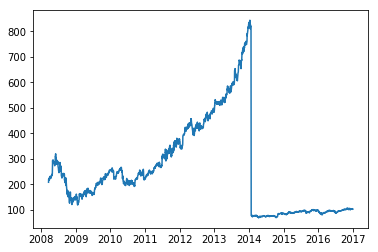

In [51]:
plt.plot(df_ma_date, df_ma_returns)
plt.show()

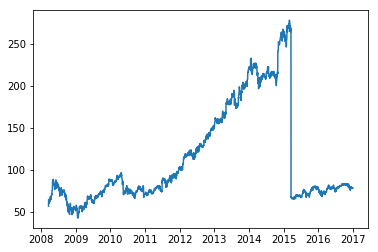

In [52]:
plt.plot(df_visa_date, df_visa_returns)
plt.show()

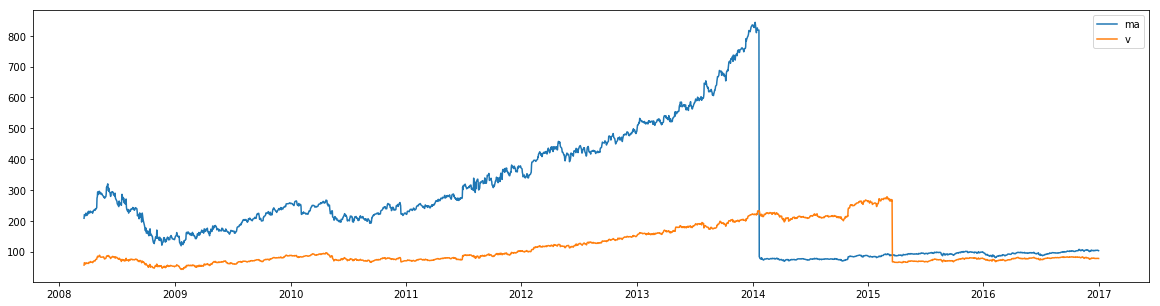

In [53]:
fig = plt.figure(figsize=(20, 5))
graph = fig.add_subplot(111)
graph.plot(df_ma_date, df_ma_returns ,label='ma')
graph.plot(df_visa_date, df_visa_returns, label='v')
plt.legend()
plt.show()

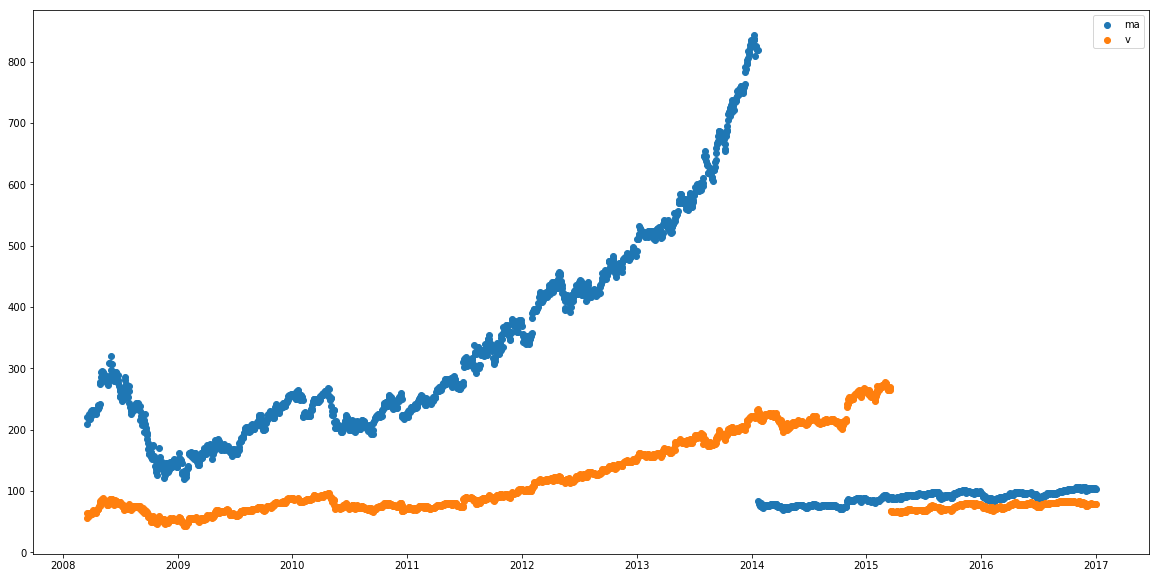

In [54]:
fig = plt.figure(figsize=(20, 10))
graph = fig.add_subplot(111)
graph.scatter(df_ma_date, df_ma_returns ,label='ma')
graph.scatter(df_visa_date, df_visa_returns, label='v')
plt.legend()
plt.show()

In [55]:
from statsmodels.tsa.stattools import adfuller

In [56]:
def ADF(v, crit='5%', max_d=6, reg='nc', autolag='AIC'):

    boolean = False

    
    adf = adfuller(v, max_d, reg, autolag)
    print (adf)
    if(adf[0] < adf[4][crit]):
        pass
    else:
        boolean = True

    return boolean

In [57]:
ADF(df_visa_returns)

(-0.81039045081067385, 0.36616048271849128, 0, 2213, {'1%': -2.5667510433581784, '5%': -1.9411220579235704, '10%': -1.6167005337597871}, 13092.326024966327)


True

In [58]:
ADF(df_ma_returns)

(-1.317203904167255, 0.17369764066252746, 0, 2213, {'1%': -2.5667510433581784, '5%': -1.9411220579235704, '10%': -1.6167005337597871}, 18645.869257439765)


True

In [59]:
def cadf(y, x):
    result = OLS(y, x).fit()
    return ADF(result.resid)

In [60]:
cadf(df_visa_returns, df_ma_returns)

(-2.042395852267866, 0.039363172905176637, 0, 2213, {'1%': -2.5667510433581784, '5%': -1.9411220579235704, '10%': -1.6167005337597871}, 14777.808581535402)


False

In [61]:
from statsmodels.regression.linear_model import OLS

In [62]:
import scipy

In [63]:
Johansen(df_ma_returns + df_visa_returns, 0).johansen

<bound method Johansen.johansen of <johansen.Johansen object at 0x1138803c8>>

In [64]:
print(Johansen(df_ma_returns + df_visa_returns, 0).johansen)

<bound method Johansen.johansen of <johansen.Johansen object at 0x1138806d8>>


In [65]:

new_df_matrix = new_df.as_matrix()
x_centered = new_df_matrix - np.mean(new_df_matrix, axis=0)

TypeError: unsupported operand type(s) for +: 'Timestamp' and 'Timestamp'

In [66]:
new_df_matrix

array([[Timestamp('2008-03-20 00:00:00'), 64.35, 220.38],
       [Timestamp('2008-03-24 00:00:00'), 59.73, 216.5],
       [Timestamp('2008-03-25 00:00:00'), 63.25, 224.98],
       ..., 
       [Timestamp('2016-12-28 00:00:00'), 78.3, 103.68],
       [Timestamp('2016-12-29 00:00:00'), 78.33, 103.77],
       [Timestamp('2016-12-30 00:00:00'), 78.02, 103.25]], dtype=object)

In [67]:
new_df_2 = new_df.iloc[: , 1:]

In [68]:
johansen = Johansen(new_df_2, model=2, significance_level=0)

In [72]:
eigenvectors, r = johansen.johansen()

print ("r values are: {}".format(r))

vec = eigenvectors[:, 0]
#vec_min = np.min(np.abs(vec))
#vec = vec / vec_min

print ("The first cointegrating relation: {}".format(vec))

r values are: [0, 1]
The first cointegrating relation: [ 0.01041685 -0.00539397]


In [73]:
vec

array([ 0.01041685, -0.00539397])

In [38]:
Visa: 1.93120072
Master = -1